<a href="https://colab.research.google.com/github/NewbieShubham/Gold-Price-Prediction/blob/main/Gold_PRice_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('goldstock.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1
5,5,2024-01-11,2019.2,270624.0,2029.4,2056.1,2017.3
6,6,2024-01-10,2027.8,183625.0,2036.0,2046.2,2025.9
7,7,2024-01-09,2033.0,194610.0,2034.5,2048.6,2031.9
8,8,2024-01-08,2033.5,199325.0,2052.6,2053.3,2022.7
9,9,2024-01-05,2049.8,208861.0,2051.4,2071.1,2030.8


In [ ]:
df.shape

(2511, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


In [ ]:
df.describe()

,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.columns

Index(['Date', 'Close', 'Volume', 'Open', 'High', 'Low', 'Year', 'target',
       'month', 'quarter', 'open-close', 'low-high', 'above_zero',
       'below_zero'],
      dtype='object')

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Close,0
Volume,0
Open,0
High,0
Low,0


In [ ]:
df['Volume'] = df['Volume'].astype('int64')
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year

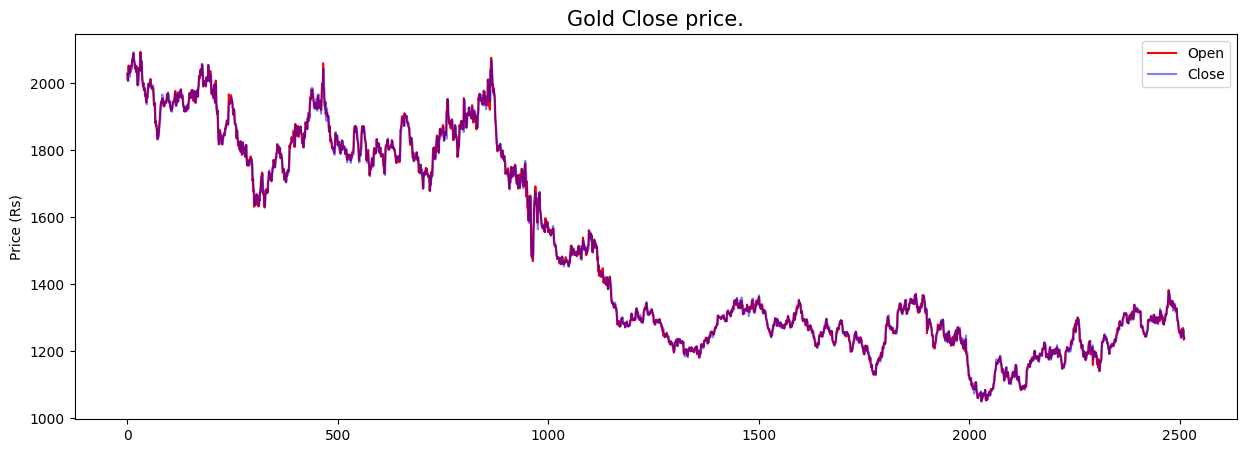

In [166]:
plt.figure(figsize=(15,5))
plt.plot(df['Open'], color = 'red', label='Open')
plt.plot(df['Close'], color = 'blue', label='Close', alpha=0.5)
plt.title('Gold Close price.', fontsize=15)
plt.ylabel('Price (Rs)')
plt.legend()
plt.show()

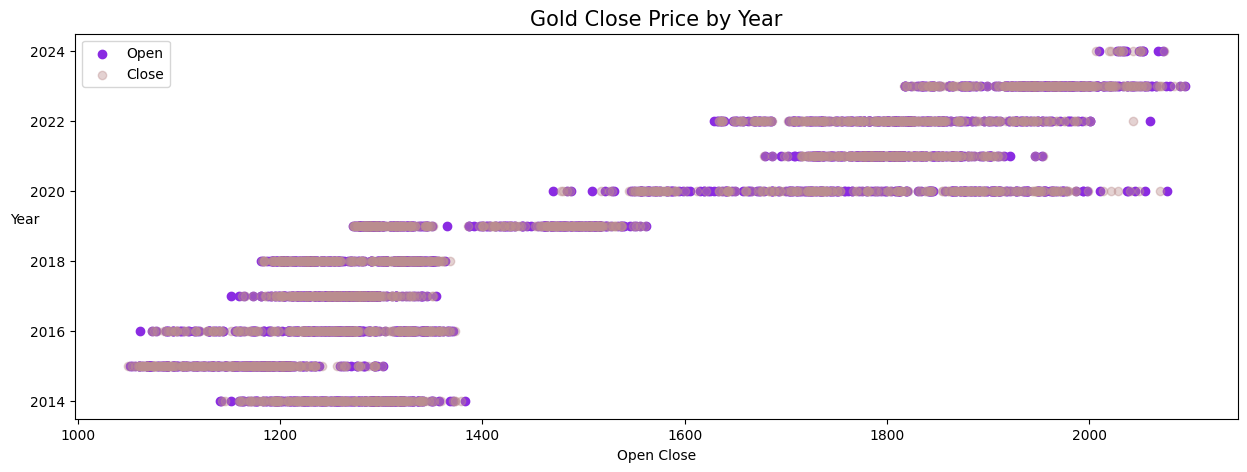

In [141]:
plt.figure(figsize=(15, 5))
open = plt.scatter(df['Open'], df['Year'], label='Open', color = 'blueviolet')
close = plt.scatter(df['Close'],df['Year'], label='Close', color = 'rosybrown', alpha=0.4)
plt.title('Gold Close Price by Year', fontsize=15)
plt.ylabel('Year', rotation=0)
plt.xlabel('Open Close')
plt.legend()
plt.show()

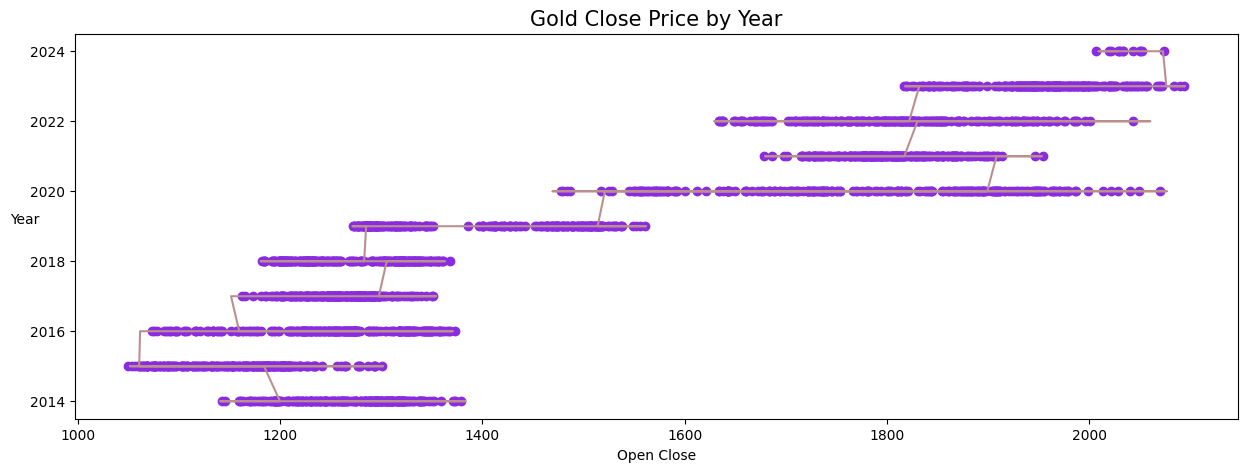

In [143]:
plt.figure(figsize=(15, 5))
plt.plot(df['Open'], df['Year'], color = 'rosybrown')
plt.scatter(df['Close'],df['Year'], color = 'blueviolet')
plt.title('Gold Close Price by Year', fontsize=15)
plt.ylabel('Year', rotation=0)
plt.yticks(rotation=0)
plt.xlabel('Open Close')
plt.show()

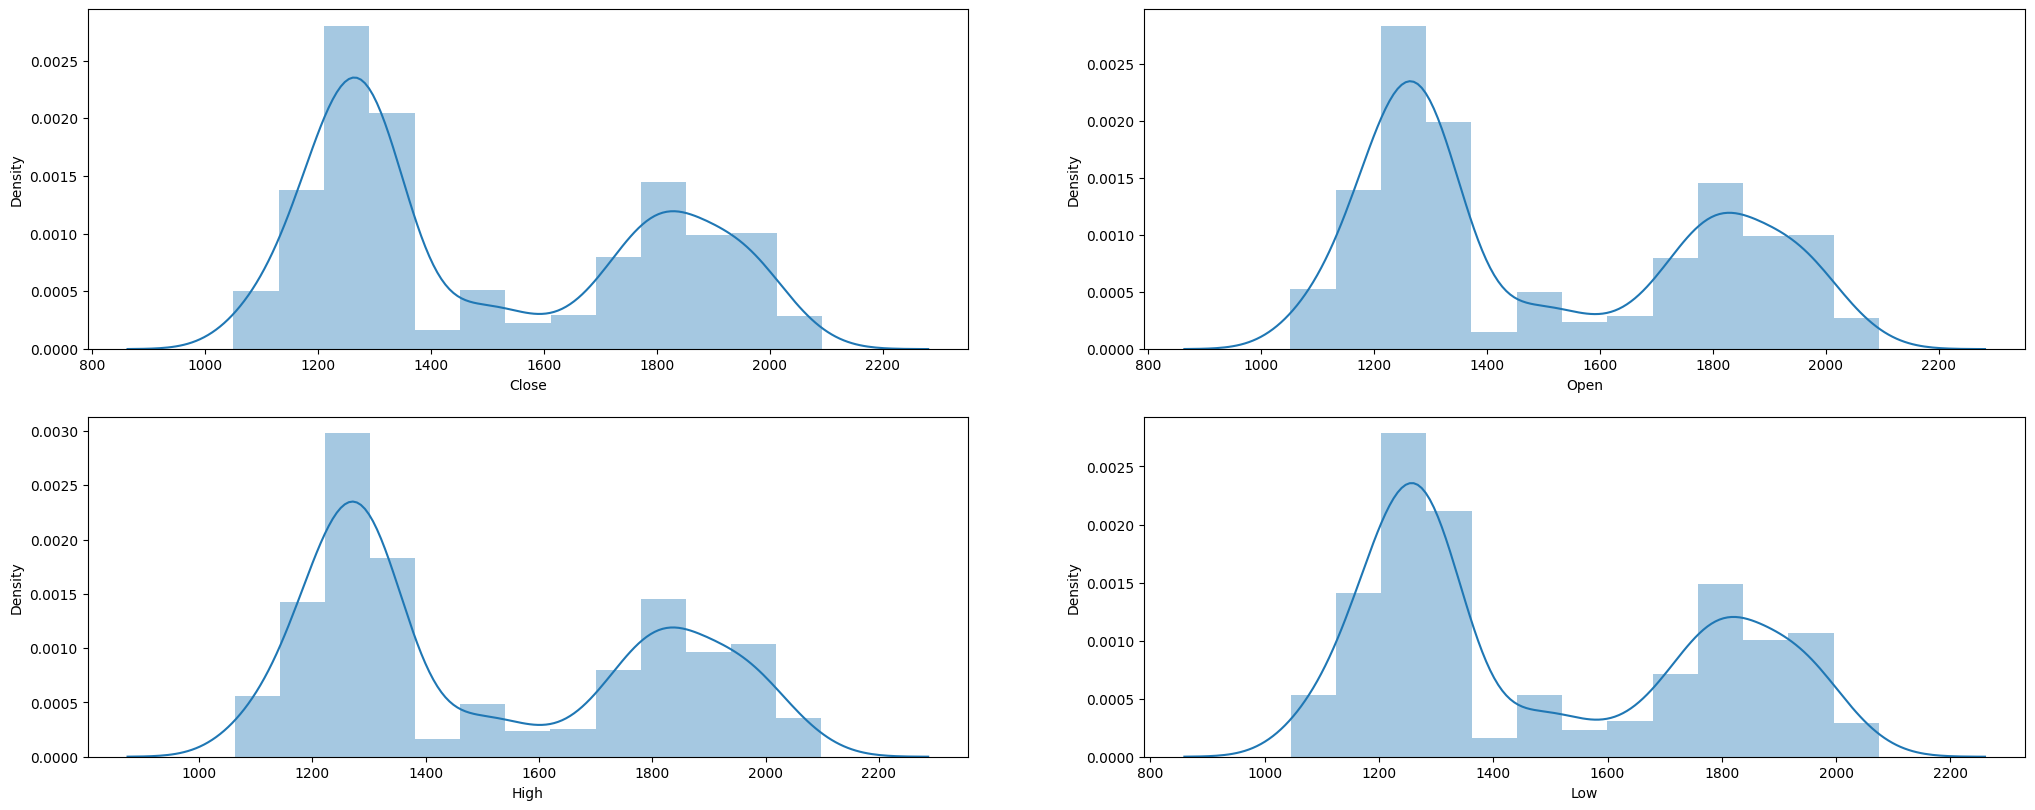

In [144]:
plt.subplots(figsize=(25,15))
for x,y in enumerate(['Close', 'Open', 'High', 'Low']):
    plt.subplot(3,2,x+1)
    sns.distplot(df[y])
plt.show()

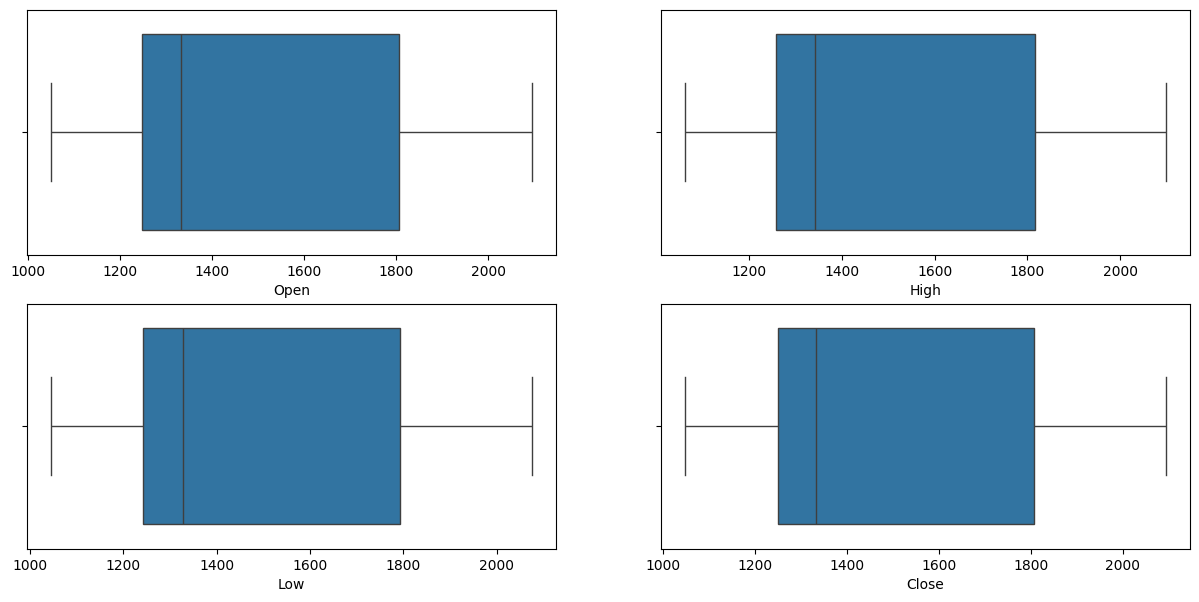

In [146]:
plt.subplots(figsize=(15,7))
for y,x in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2, y+1)
  sns.boxplot(df[x], orient='h')
plt.show()

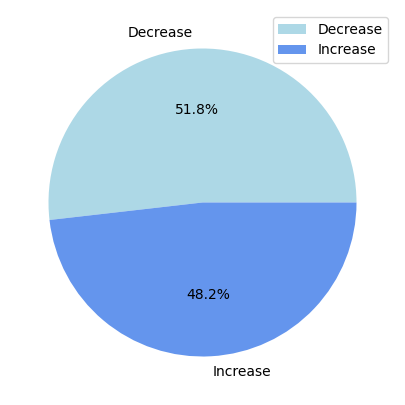

In [ ]:
plt.figure(figsize = (6, 5))
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1,0)
plt.pie(df['target'].value_counts().values, labels=['Decrease', 'Increase'], autopct='%1.1f%%', colors=[ 'lightblue', 'cornflowerblue'])
plt.legend()
plt.show()

In [148]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year

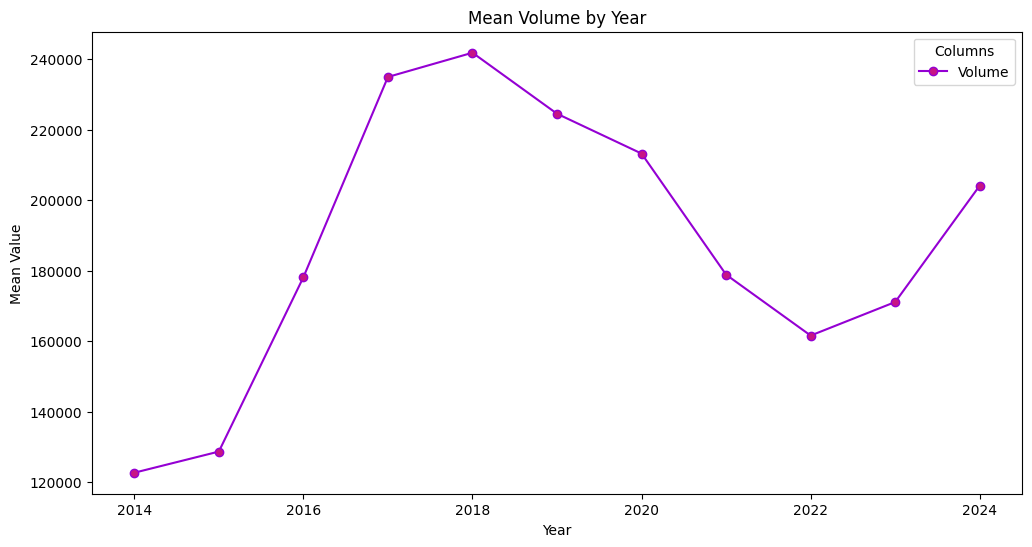

In [153]:
data_grouped = df.groupby('Year')['Volume'].mean()
plt.figure(figsize=(12,6))
data_grouped.plot(kind='line', marker='o', color='darkviolet', markerfacecolor='mediumvioletred')
plt.title('Mean Volume by Year')
plt.xlabel('Year')
plt.ylabel('Mean Value')
plt.legend(title='Columns')
plt.show()

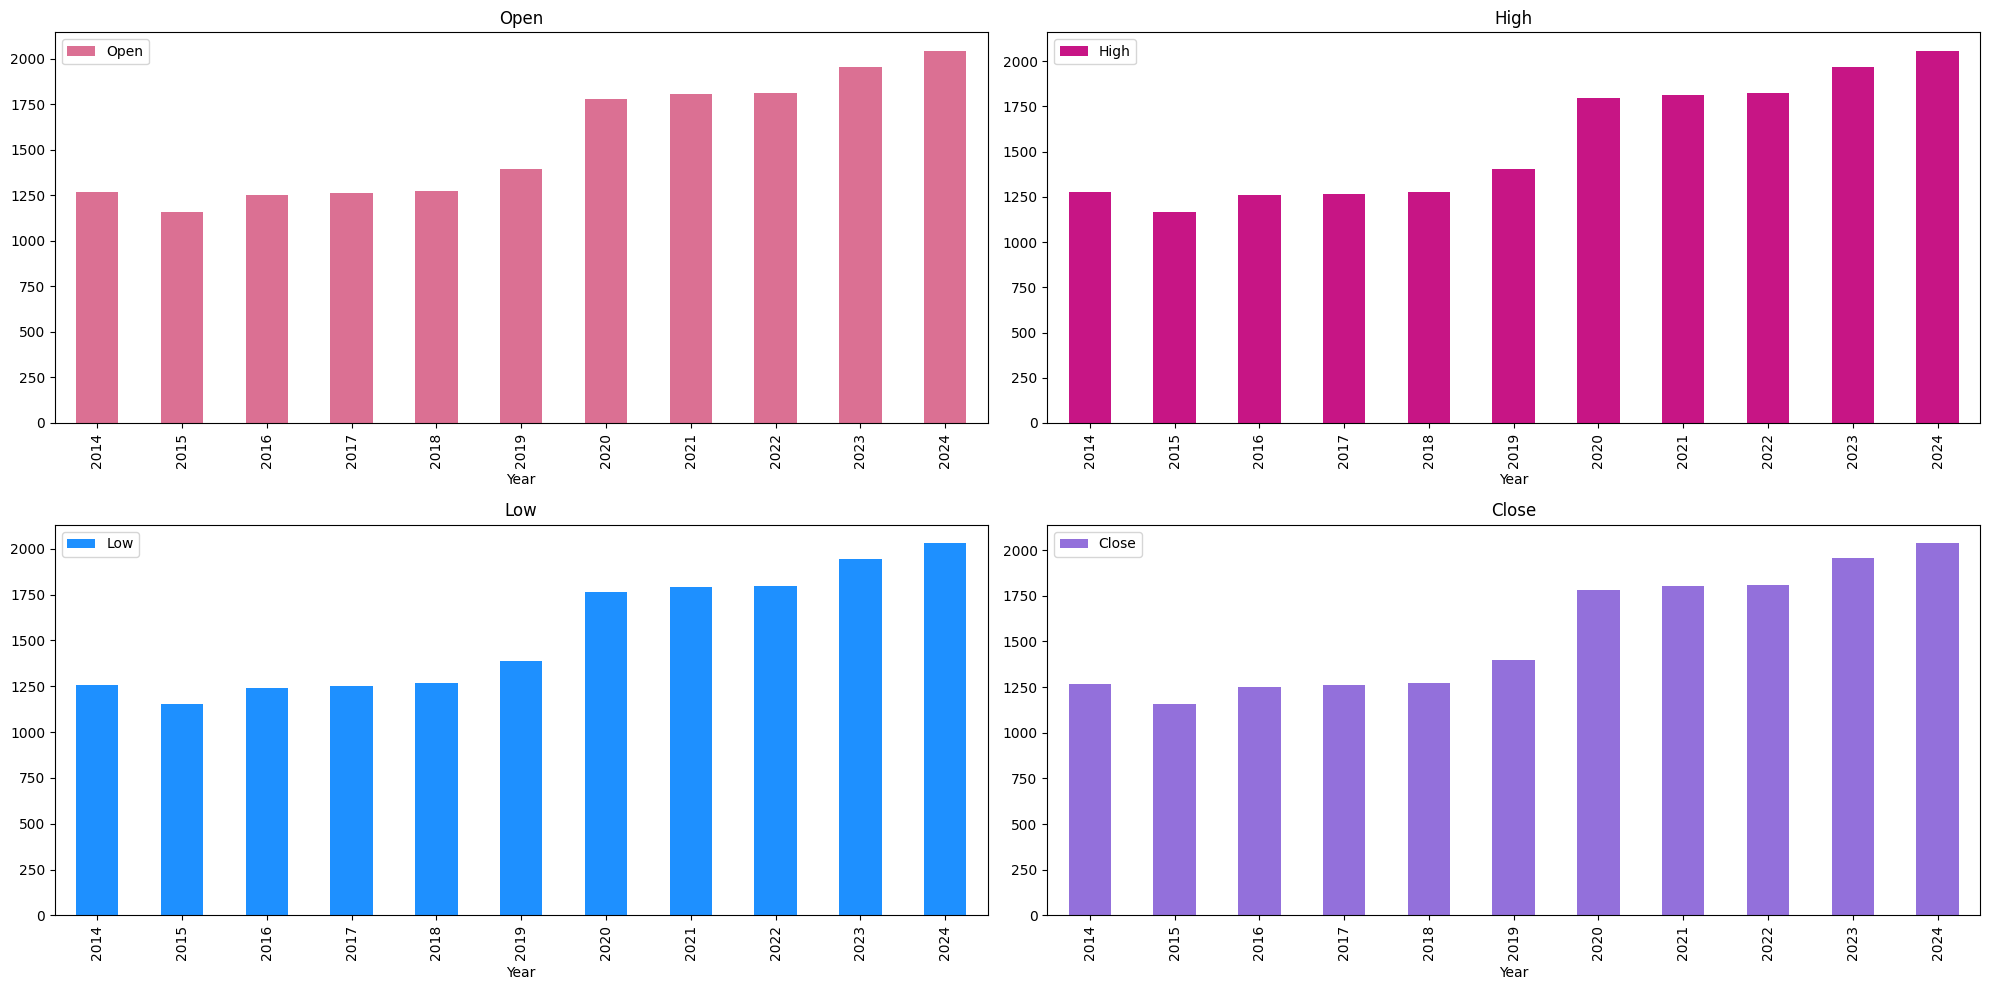

In [124]:
plt.subplots(figsize=(20, 10))
colors = ['palevioletred', 'mediumvioletred', 'dodgerblue', 'mediumpurple']
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
    plt.subplot(2, 2, i + 1)
    data_grouped[col].plot.bar(color=colors[i])
    plt.title(col)
    plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
df['strDate'] = df['Date'].astype(str)

In [ ]:
splitted = df['strDate'].str.split('-', expand=True)
df['month'] = splitted[1].astype('int')

In [ ]:
df = df.drop('strDate', axis=1)

In [ ]:
df['quarter'] = (df['month'] - 1) // 3 + 1

In [ ]:
df.groupby('quarter').mean()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Year,target,month
quarter,,,,,,,,,,
1,1311.061990,2018-11-06 08:29:45.318107648,1489.098042,188056.890701,1489.211419,1499.820881,1478.179608,2018.722675,0.471452,2.029364
2,1309.242857,2018-11-08 14:42:17.142857216,1500.373016,179994.079365,1500.028889,1509.658571,1490.713651,2018.482540,0.476190,5.014286
3,1241.935535,2019-02-13 11:41:53.207547136,1512.288679,195616.012579,1512.905346,1522.180346,1502.450000,2018.496855,0.501572,7.990566
4,1182.715190,2019-05-09 05:39:29.620253184,1492.774525,180198.856013,1492.384810,1501.803481,1483.734968,2018.477848,0.477848,11.017405


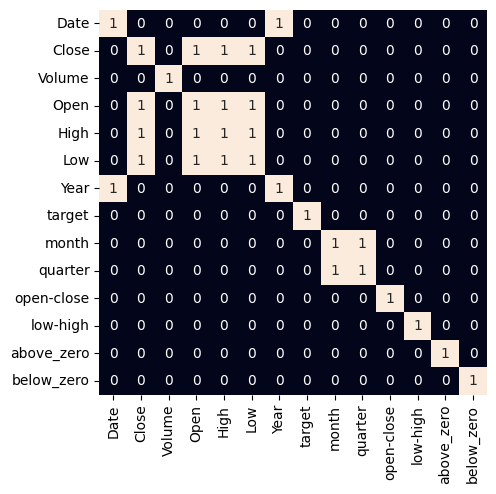

In [94]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [ ]:
df['open-close']  = df['Close'] - df['Open']
df['low-high']  = df['High'] - df['Low']

In [ ]:
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low,Year,target,month,quarter,open-close,low-high
0,0,2024-01-19,2029.3,166078,2027.4,2041.9,2022.2,2024,0,1,1,1.9,19.7
1,1,2024-01-18,2021.6,167013,2009.1,2025.6,2007.7,2024,0,1,1,12.5,17.9
2,2,2024-01-17,2006.5,245194,2031.7,2036.1,2004.6,2024,1,1,1,-25.2,31.5
3,3,2024-01-16,2030.2,277995,2053.4,2062.8,2027.6,2024,1,1,1,-23.2,35.2
4,4,2024-01-12,2051.6,250946,2033.2,2067.3,2033.1,2024,0,1,1,18.4,34.2


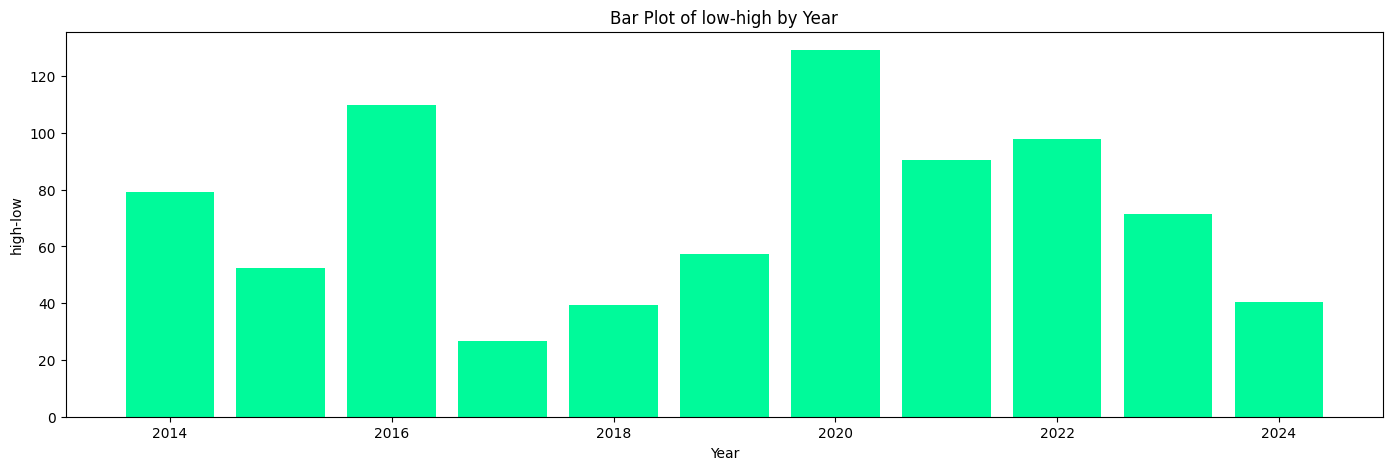

In [93]:
plt.figure(figsize=(17, 5))
plt.bar(df['Year'], df['low-high'], color= 'mediumspringgreen')
plt.xlabel('Year')
plt.ylabel('high-low')
plt.title('Bar Plot of low-high by Year')
plt.show()

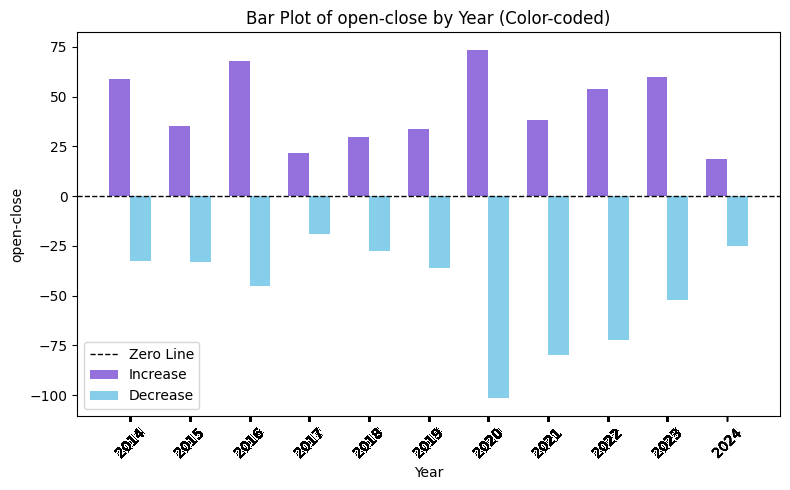

In [ ]:
zero_line = [0] * len(df)
df['above_zero'] = df['open-close'].apply(lambda x: x if x >= 0 else 0)
df['below_zero'] = df['open-close'].apply(lambda x: x if x < 0 else 0)
bar_width = 0.35
plt.figure(figsize=(8, 5))
plt.bar(df['Year'] - bar_width/2, df['above_zero'], bar_width, label='Increase', color='mediumpurple')
plt.bar(df['Year'] + bar_width/2, df['below_zero'], bar_width, label='Decrease', color='skyblue')
plt.axhline(y=0, color='black', linestyle='--', linewidth=1, label='Zero Line')
plt.xlabel('Year')
plt.ylabel('open-close')
plt.title('Bar Plot of open-close by Year (Color-coded)')
plt.xticks(df['Year'], rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

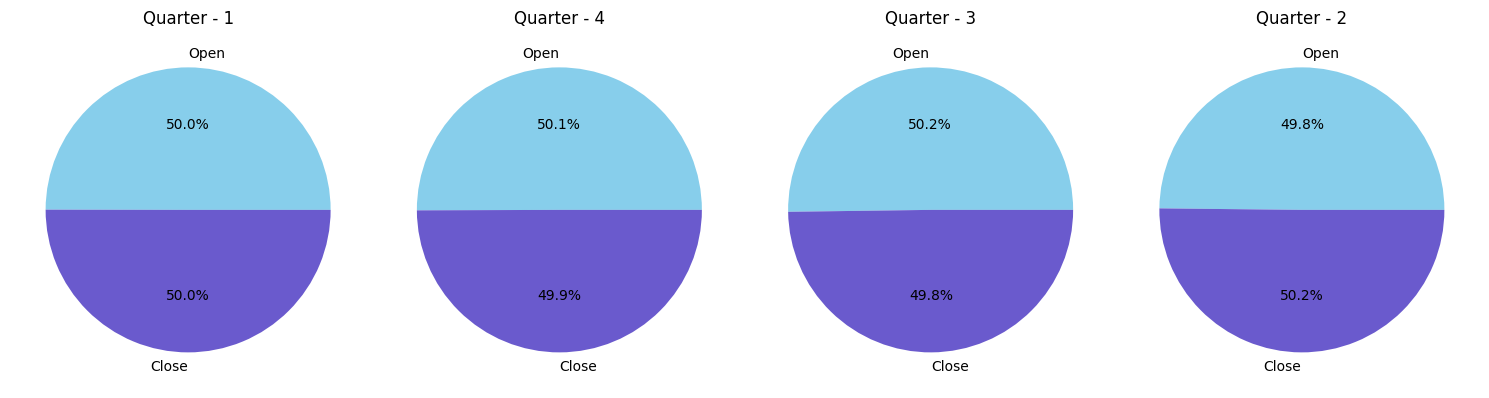

In [46]:
plt.subplots(figsize=(15, 10))
quarter = df['quarter'].unique()
for i, q in enumerate(quarter):
    quarter_data = df[df['quarter'] == q]
    open_values = [quarter_data['Open'].iloc[0]]
    close_values = [quarter_data['Close'].iloc[0]]
    pie_labels = ['Open', 'Close']
    plt.subplot(1, 4, i + 1)
    plt.pie(open_values + close_values, labels=pie_labels, autopct='%1.1f%%',colors = ['skyblue', 'slateblue'])
    plt.title(f"Quarter - {q}")
plt.tight_layout()
plt.show()

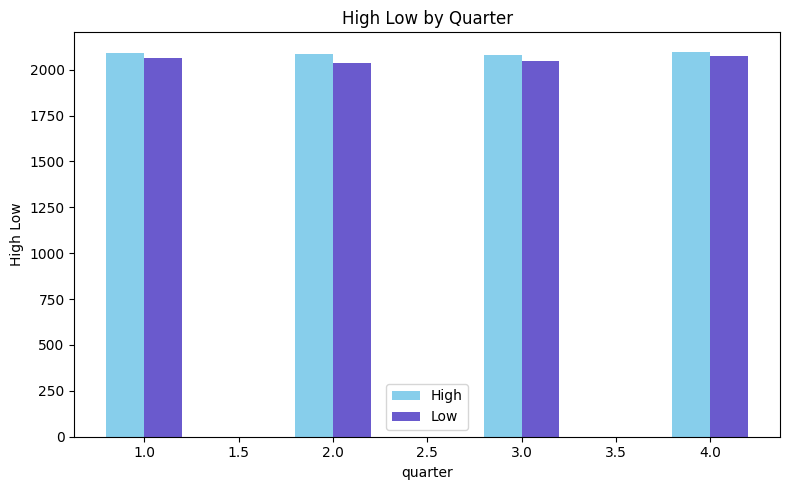

In [ ]:
bar_width = 0.2
plt.figure(figsize=(8, 5))
plt.bar(df['quarter']-bar_width/2, df['High'], bar_width, label='High', color='skyblue')
plt.bar(df['quarter']+ bar_width/2, df['Low'], bar_width, label='Low', color='slateblue')
plt.xlabel('quarter')
plt.ylabel('High Low')
plt.title('High Low by Quarter')
plt.legend()
plt.tight_layout()
plt.show()

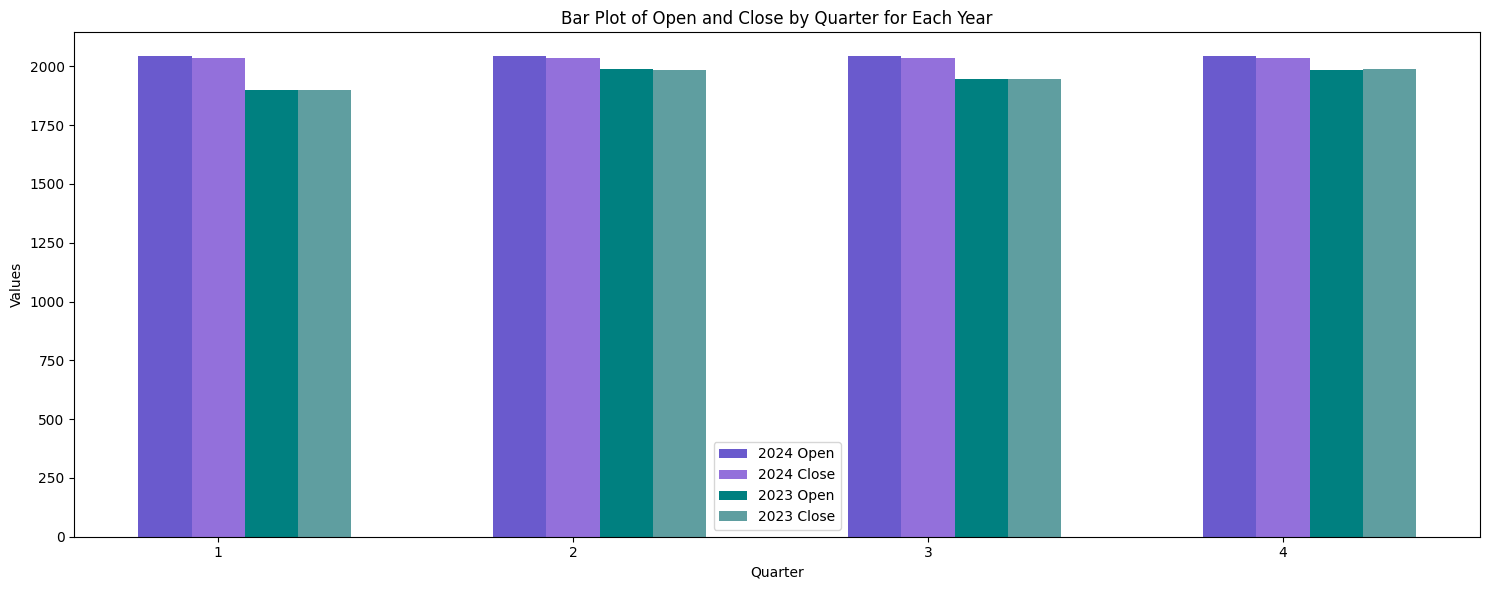

In [116]:
df_filtered = df[df['Year'].isin([2024, 2023])]
df_grouped = df_filtered.groupby(['Year', 'quarter'])[['Open', 'Close']].mean().reset_index()
quarters = [1, 2, 3, 4]
bar_width = 0.15
years = [2024, 2023]
index = np.arange(len(quarters))
colors = {
    2024: {'open': 'slateblue', 'close': 'mediumpurple'},
    2023: {'open': 'teal', 'close': 'cadetblue'}
}
fig, ax = plt.subplots(figsize=(15, 6))
for i, year in enumerate(years):
    open_values = df_grouped[df_grouped['Year'] == year]['Open']
    close_values = df_grouped[df_grouped['Year'] == year]['Close']
    ax.bar(index + (i * bar_width)*2, open_values, bar_width, label=f'{year} Open', color=colors[year]['open'])
    ax.bar(index + (i + 0.5)*2 * bar_width, close_values, bar_width, label=f'{year} Close', color=colors[year]['close'])
ax.set_xlabel('Quarter')
ax.set_ylabel('Values')
ax.set_title('Bar Plot of Open and Close by Quarter for Each Year')
ax.set_xticks(index + bar_width)
ax.set_xticklabels(quarters)
ax.legend()
plt.tight_layout()
plt.show()

**>>*Scaling***

In [167]:
df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.groupby('is_quarter_end').mean()
features = df[['open-close', 'low-high', 'is_quarter_end']]
target = df['target']
scaler = StandardScaler()
features = scaler.fit_transform(features)
X_train, X_valid, Y_train, Y_valid = train_test_split(features, target, test_size=0.1, random_state=2024)
print(X_train.shape, X_valid.shape)

(2259, 3) (252, 3)


In [168]:
models = [LogisticRegression(), SVC(kernel='poly', probability=True), XGBClassifier()]
for i in range(3):
  models[i].fit(X_train, Y_train)
  print(f'{models[i]} :')
  print('Training Accuracy :', metrics.roc_auc_score(Y_train, models[i].predict_proba(X_train)[:,1]))
  print('Validation Accuracy :', metrics.roc_auc_score(Y_valid, models[i].predict_proba(X_valid)[:,1]))

LogisticRegression() :
Training Accuracy : 0.9407264174074866
Validation Accuracy : 0.9530256801423851
SVC(kernel='poly', probability=True) :
Training Accuracy : 0.9313316526047103
Validation Accuracy : 0.9608441393338418
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...) :
Training Accuracy 

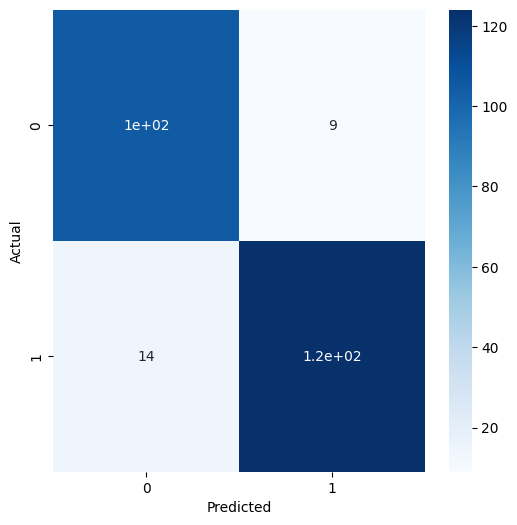

In [169]:
cm = confusion_matrix(Y_valid, models[0].predict(X_valid))
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()